In [442]:
#Description this program predicts the price of Coca-cola stock for a specific day using machine learning algorithm
from sklearn.svm import SVR
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [443]:
df=yf.Ticker('KO').history(start='2020-10-02', end='2020-11-1')
#df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2020-10-01 to 2020-10-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          22 non-null     float64
 1   High          22 non-null     float64
 2   Low           22 non-null     float64
 3   Close         22 non-null     float64
 4   Volume        22 non-null     int64  
 5   Dividends     22 non-null     int64  
 6   Stock Splits  22 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 1.4 KB


In [444]:
actual_price = df.tail(1)
#Show the data
actual_price

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-10-30,45.638852,45.934772,45.218831,45.877499,15804000,0,0


In [445]:
#create empty list
days = list()
close_price= list()

In [446]:
#Get only the date and adjusted close price
df['df_days']=df.index.values.astype('<M8[D]').astype(str)#Converting date time index into strings
close = df.loc[:,'Close']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2020-10-01 to 2020-10-30
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          22 non-null     float64
 1   High          22 non-null     float64
 2   Low           22 non-null     float64
 3   Close         22 non-null     float64
 4   Volume        22 non-null     int64  
 5   Dividends     22 non-null     int64  
 6   Stock Splits  22 non-null     int64  
 7   df_days       22 non-null     object 
dtypes: float64(4), int64(3), object(1)
memory usage: 1.5+ KB


In [447]:
#create the independent data set(Dates)
for day in df.df_days:
    print(day)
    days.append([int(day.split('-')[2])])
#Create the Dependent data set (close)
for price in close:
    close_price.append(float(price))
close_price
days

2020-10-01
2020-10-02
2020-10-05
2020-10-06
2020-10-07
2020-10-08
2020-10-09
2020-10-12
2020-10-13
2020-10-14
2020-10-15
2020-10-16
2020-10-19
2020-10-20
2020-10-21
2020-10-22
2020-10-23
2020-10-26
2020-10-27
2020-10-28
2020-10-29
2020-10-30


[[1],
 [2],
 [5],
 [6],
 [7],
 [8],
 [9],
 [12],
 [13],
 [14],
 [15],
 [16],
 [19],
 [20],
 [21],
 [22],
 [23],
 [26],
 [27],
 [28],
 [29],
 [30]]

In [458]:
days1=days[:-1]
close_price1=close_price[:-1]
#create 3 models
lin_svr= SVR(kernel='linear',C=1000.0)# C= Regularizatuion to over fit and under fit the model
lin_svr.fit(days1,close_price1)

poly_svr= SVR(kernel='poly',C=1000.0,degree=2)
poly_svr=poly_svr.fit(days1,close_price1)

rbf_svr= SVR(kernel='rbf',C=1000.0,gamma=0.95)
rbf_svr=rbf_svr.fit(days1,close_price1)
days

[[1],
 [2],
 [5],
 [6],
 [7],
 [8],
 [9],
 [12],
 [13],
 [14],
 [15],
 [16],
 [19],
 [20],
 [21],
 [22],
 [23],
 [26],
 [27],
 [28],
 [29],
 [30]]

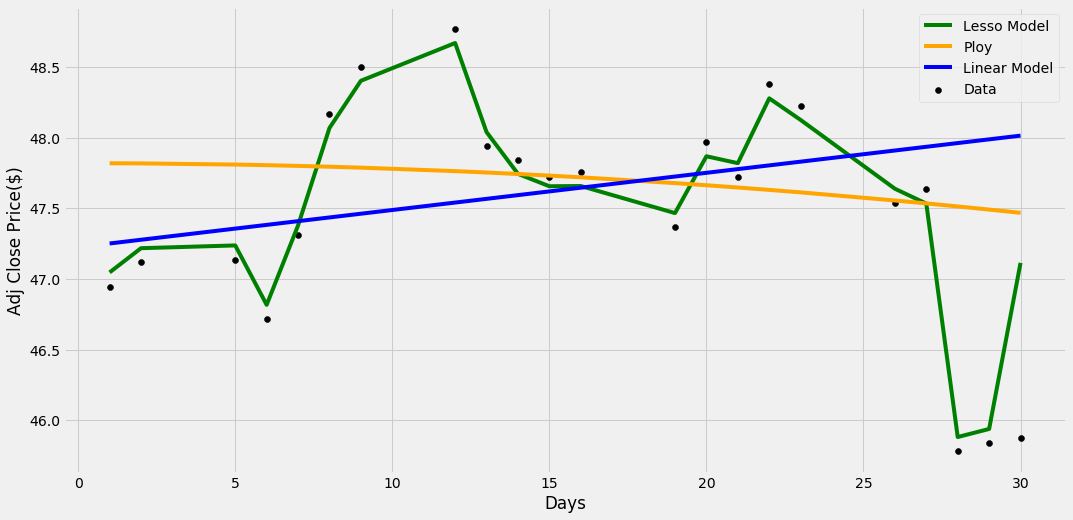

In [459]:
#plot the model
plt.figure(figsize=(16,8))
plt.scatter(days,close_price,color='black',label='Data')
plt.plot(days,rbf_svr.predict(days),color='green',label='Lesso Model')
plt.plot(days,poly_svr.predict(days),color='orange', label='Ploy')
plt.plot(days,lin_svr.predict(days),color='blue', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price($)')
plt.legend()
plt.show()

In [462]:
day=[[30]]
print('The RBF predicted Model: ',rbf_svr.predict(day))
print('The poly predicted Model: ',poly_svr.predict(day))
print('The linear predicted Model: ',lin_svr.predict(day))

The RBF predicted Model:  [47.11425932]
The poly predicted Model:  [47.4682852]
The linear predicted Model:  [48.01448193]


In [466]:
print('The Actual Price: ',df['Close'][21])

The Actual Price:  45.877498626708984
